In [412]:
import os
import albumentations as A
import albumentations.pytorch
import albumentations.augmentations.transforms
import random
import torch
from glob import glob

import cv2

import pandas as pd
from Datasets import AugDataSet
from sklearn.model_selection import train_test_split
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
%matplotlib inline 

old_path = "/opt/ml/outputs/old_df.csv"
old_df = pd.read_csv("/opt/ml/outputs/old_df.csv")

df = pd.read_csv("/opt/ml/outputs/img_path.csv")
y = df["class"]
X = df.copy().drop(["class"], axis=1) # path

In [423]:
train_df = pd.read_csv("/opt/ml/input/data/train/train.csv")

all_path = list(df.path)

In [434]:
count = 0
for i in all_path:
    if '60' in i:
        count+=1
    if '59' in i:
        count += 1
    if '58' in i:
        count += 1    
print(count)        
count/len(all_path)    

1897


0.10037037037037037

In [414]:
old_df.columns = ["path","class"]
old_img_path = list(old_df.path)


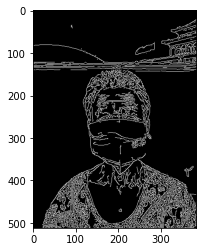

In [319]:
o = old_img_path[139]
a = all_path[50]
image = cv2.imread(o)

image = cv2.Canny(image,50,100)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)


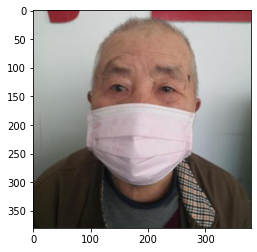

In [401]:
from albumentations.core.transforms_interface import ImageOnlyTransform
# https://dacon.io/codeshare/2360

def canny_edges(image):
    image = cv2.Canny(image,50,100)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image

class Canny(ImageOnlyTransform):
    
    def __init__(self, always_apply=False, p=1):        
        super(Canny, self).__init__(always_apply, p)
    
    def apply(self, img, **params):
        return canny_edges(img)

transform = A.Compose([
    A.Resize(512,384), #사진 크기가 같아서 필요 X,
    A.CenterCrop (380,380, always_apply=False, p=1.0),
#     A.Crop (x_min=130, y_min=130, x_max=250, y_max=300, always_apply=False, p=1.0),
#     A.RandomCrop(height=200, width=200),
#     A.RandomGridShuffle(grid=(10, 10), always_apply=False, p=1),
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(p=0.5),
#     A.RandomGridShuffle (grid=(2, 2), always_apply=False, p=0.5), # grid 랜덤 셔플
#     A.Blur(p=1), # 흐리게
#     A.ChannelShuffle(p=0.5), # RGB 랜덤 셔플
#    A.FancyPCA(p=1), # https://pixelatedbrian.github.io/2018-04-29-fancy_pca/ # 특정 색 강조?
#    A.GlassBlur(p=1), # 유리 노이즈
#   A.GridDistortion(p=1), # 특정 Grid에 왜곡을줌 이미지를 구부리는 효과? 좀쓸만해보이는듯
#     Canny(p=0.5),
    A.pytorch.transforms.ToTensorV2() # 텐서로
    
    ])   

old_dataset = AugDataSet( 
#     image_paths = list(X["path"].values), 
    image_paths =old_img_path,
    labels = list(y.values), 
    transform = transform
)

plt.imshow(np.transpose(old_dataset[0][0],(1,2,0)))
plt.show()

In [410]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import StratifiedKFold


gss = GroupShuffleSplit(n_splits=5)
sfk = StratifiedKFold(n_splits=5)


In [363]:
def face_detection(img_path):
    img = img_path
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,     # 이미지에서 얼굴 크기가 서로 다른 것을 보상해주는 값
        minNeighbors=5,    # 얼굴 사이의 최소 간격(픽셀)입니다
        minSize=(30, 30),   # 얼굴의 최소 크기입니다
    )

    if len(faces)==0:
        return 0,0,384,512
    faces = faces[0]

    x_min = faces[0]
    y_min = faces[1]
    x_max = x_min+faces[2]
    y_max = y_min+faces[3]
    
    return x_min, y_min, x_max, y_max

In [364]:
cascPath = "haarcascade_frontalface_default.xml"
# cascPath = "haarcascade_eye.xml"

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + cascPath)

In [417]:
old_img_path = [i for i in old_img_path if '59' in i]

In [418]:
old_img_path[:10]

['/opt/ml/input/data/train/images/001459_female_Asian_60/mask4.jpg',
 '/opt/ml/input/data/train/images/001459_female_Asian_60/incorrect_mask.jpg',
 '/opt/ml/input/data/train/images/001459_female_Asian_60/normal.jpg',
 '/opt/ml/input/data/train/images/001459_female_Asian_60/mask2.jpg',
 '/opt/ml/input/data/train/images/001459_female_Asian_60/mask1.jpg',
 '/opt/ml/input/data/train/images/001459_female_Asian_60/mask3.jpg',
 '/opt/ml/input/data/train/images/001459_female_Asian_60/mask5.jpg',
 '/opt/ml/input/data/train/images/001593_female_Asian_60/mask4.jpg',
 '/opt/ml/input/data/train/images/001593_female_Asian_60/incorrect_mask.jpg',
 '/opt/ml/input/data/train/images/001593_female_Asian_60/normal.jpg']

In [420]:
fn_path = []
for i in all_path:
    if '59' in i:
        fn_path.append(i)

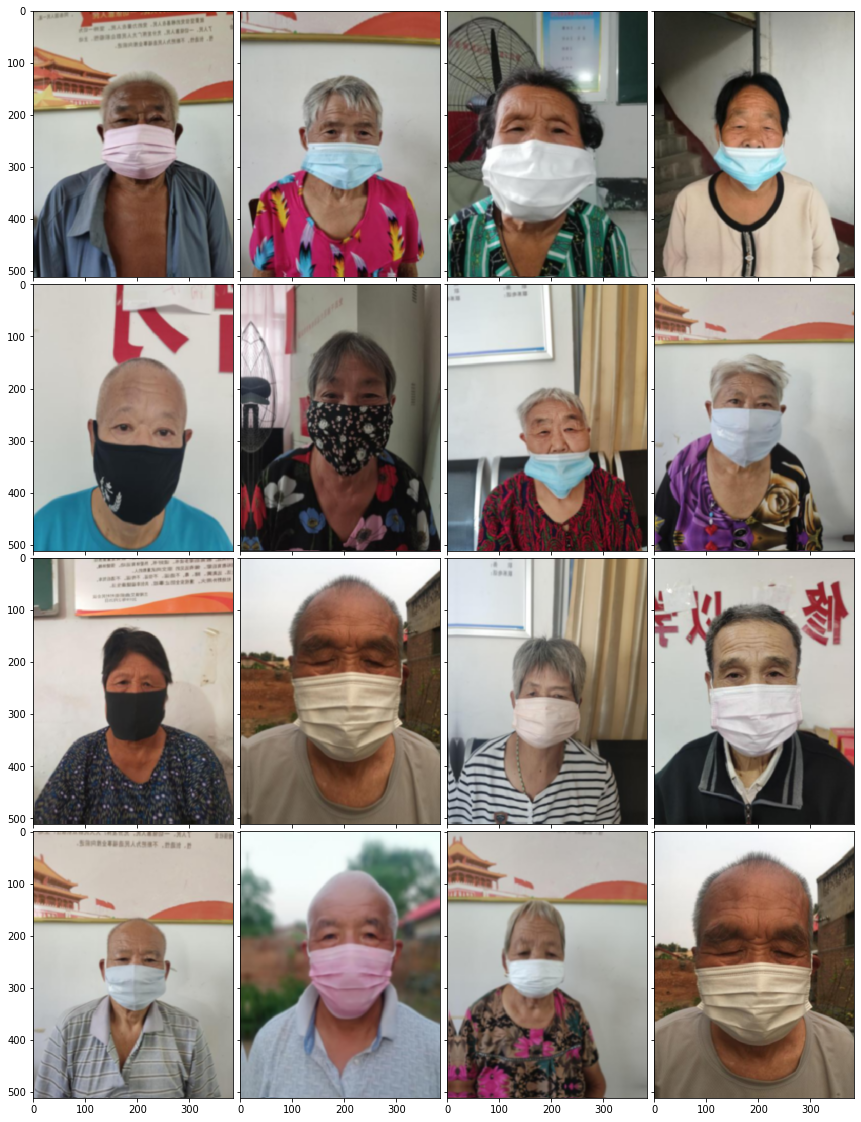

In [429]:
# img_arr = [np.transpose(old_dataset[i][0],(1,2,0)) for i in  np.random.randint(400, size=16)]
old_img_path = list(old_df.path)

# old_img_path = [i for i in old_img_path if 'mask' in i]

img_arr = [old_img_path[i] for i in np.random.randint(len(old_img_path), size=16)] # 랜덤으로 사진 불러오기
fig = plt.figure(figsize=(20., 20.)) # fig 생성

# 격자 생성
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes
                 )

# 
for ax, img_path in zip(grid, img_arr):

    # Read the image
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    transform = A.Compose([
#         A.Crop(x_min = 50,y_min = 100,x_max = 300, y_max = 400, always_apply=False, p=1.0),
        A.Resize(512,384),
#         A.CenterCrop (380,380, always_apply=False, p=1.0),
        A.GaussianBlur (blur_limit=(3, 7), sigma_limit=0, always_apply=False, p=1),
        #         A.Crop (*face_detection(img_path), always_apply=False, p=1.0),
        A.GridDistortion(num_steps=10, distort_limit=0.2,p=1),
#         A.Resize(256,194)
        A.HorizontalFlip(p=1),
#         A.RandomGridShuffle (grid=(8, 8), always_apply=False, p=1), # grid 랜덤 셔플

    ])    
    

    image = transform(image=image)

    ax.imshow(image['image'])
    
plt.show()

In [422]:
############### 저장 용 ########################



# old_img_path = [i for i in old_img_path if 'normal' in i]

for i,img_path in enumerate(image_path):

    # Read the image
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    transform = A.Compose([
        A.Resize(512,384),
        A.GaussianBlur (blur_limit=(3, 7), sigma_limit=0, always_apply=False, p=1),
            A.GridDistortion(num_steps=10, distort_limit=0.1,p=1),
        A.HorizontalFlip(p=1),
    ])     
    
    image = transform(image=image)
    image = image['image']

    
    folder = img_path.split('/')[-2]
    name = img_path.split('/')[-1].replace('.jpg','')    
    
    plt.imsave(f'/opt/ml/input/data/train/images/{folder}/{name}_.jpg',image)

# df = pd.Series(old_grid_df)    
    
# df.to_csv("/opt/ml/Augmentation/old_grid_df.csv")


In [169]:
old_df = pd.read_csv("/opt/ml/outputs/old_df.csv")
old_df = dict(old_df)

In [ ]:
for n,img in enumerate(aug_dataset):
    img = img[0] # 튜플 풀기    
    img = img.numpy() # ndarray
    img = img.T # rgb 재배치
    plt.imsave(f'/opt/ml/Augmentation/GridShuffle/{n}.jpg',img)
    